In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
station = pd.read_csv('fin_station.csv')
car = pd.read_csv('fin_car.csv')

In [4]:
station

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,537,543,530,462,1111,1030,720,727,999,864
1,7,22,85,59,60,100,189,442,1879,930


In [8]:
station = station.rename(index={0:'주유소', 1:'충전소'})
station

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
주유소,537,543,530,462,1111,1030,720,727,999,864
충전소,7,22,85,59,60,100,189,442,1879,930


In [24]:
station = station.transpose()
station

,주유소,충전소
2010,537,7
2011,543,22
2012,530,85
2013,462,59
2014,1111,60
2015,1030,100
2016,720,189
2017,727,442
2018,999,1879
2019,864,930


In [5]:
car

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,212079328,219196145,224135041,230189304,237674621,247047392,257452046,266481596,274602415,280998131,287398494
1,234,1482,4705,5411,14150,33375,51866,76786,215227,607059,1041898


In [9]:
car = car.rename(index={0:'일반차', 1:'전기차'})
car

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
일반차,212079328,219196145,224135041,230189304,237674621,247047392,257452046,266481596,274602415,280998131,287398494
전기차,234,1482,4705,5411,14150,33375,51866,76786,215227,607059,1041898


In [26]:
car = car.transpose()
car

,일반차,전기차
2010,212079328,234
2011,219196145,1482
2012,224135041,4705
2013,230189304,5411
2014,237674621,14150
2015,247047392,33375
2016,257452046,51866
2017,266481596,76786
2018,274602415,215227
2019,280998131,607059


In [33]:
car = car.drop('2020', axis=0)
car

,일반차,전기차
2010,212079328,234
2011,219196145,1482
2012,224135041,4705
2013,230189304,5411
2014,237674621,14150
2015,247047392,33375
2016,257452046,51866
2017,266481596,76786
2018,274602415,215227
2019,280998131,607059


Text(0.5, 1.0, 'Comparison of the number of Gas stations/Charging stations by year')

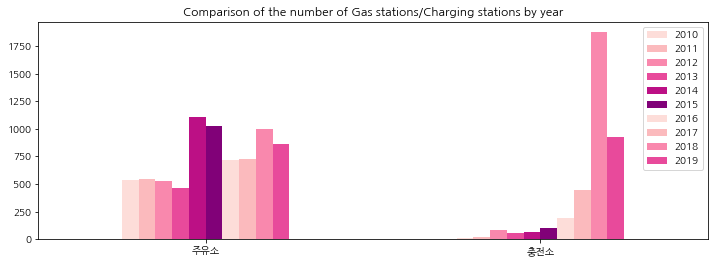

In [143]:
# 연도별 주유
copy_station = station.transpose().copy()

colors = sns.color_palette('RdPu')
ax1 = copy_station.plot(kind='bar', title='station', figsize=(12,4), color=colors, legend=True)
plt.xticks(rotation=0)
plt.title("Comparison of the number of Gas stations/Charging stations by year")

In [114]:
car.describe()

,일반차,전기차
count,1.000000e+01,10.000000
mean,2.449856e+08,101029.500000
std,2.415424e+07,189363.742925
min,2.120793e+08,234.000000
25%,2.256486e+08,4881.500000
50%,2.423610e+08,23762.500000
75%,2.642242e+08,70556.000000
max,2.809981e+08,607059.000000


In [113]:
station.describe()

,주유소,충전소
count,10.000000,10.000000
mean,752.300000,377.300000
std,236.797171,598.879704
min,462.000000,7.000000
25%,538.500000,59.250000
50%,723.500000,92.500000
75%,965.250000,378.750000
max,1111.000000,1879.000000


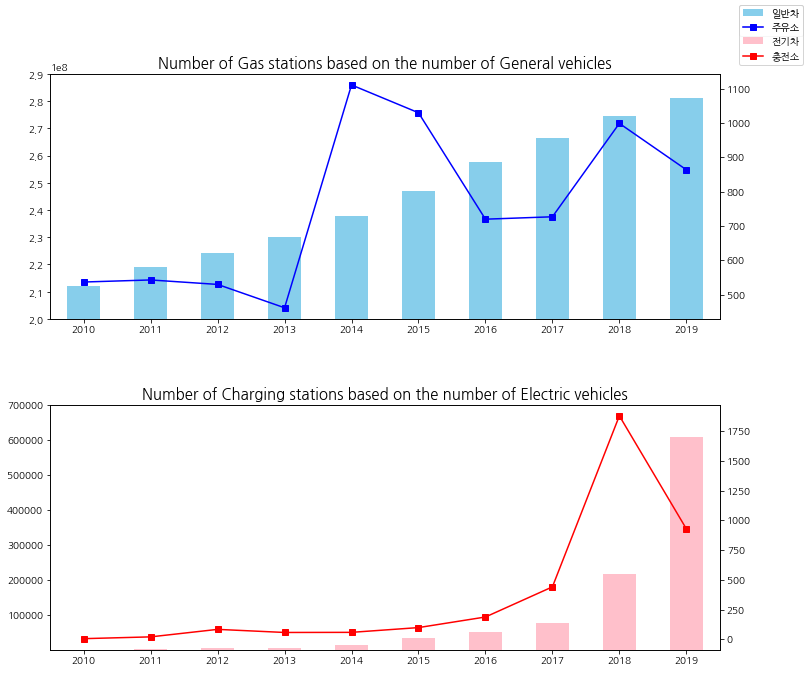

In [155]:
'''
plt.subplot(2,1,1)
car['일반차'].plot(kind='bar')
station['주유소'].plot(kind='line')
'''
fig = plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
ax1 = car['일반차'].plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)
plt.ylim(200000000,290000000)
ax2 = ax1.twinx()
ax2 = station['주유소'].plot(kind='line', color='blue', marker='s')
plt.title("Number of Gas stations based on the number of General vehicles", fontsize=15)
fig.legend(loc='upper right')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.subplot(2,1,2)
ax3 = car['전기차'].plot(kind='bar', color='pink')
plt.xticks(rotation=0)
plt.ylim(100,700000)
ax4 = ax3.twinx()
ax4 = station['충전소'].plot(kind='line', color='red', marker='s')
plt.title("Number of Charging stations based on the number of Electric vehicles", fontsize=15)
fig.legend(loc='upper right')

No handles with labels found to put in legend.


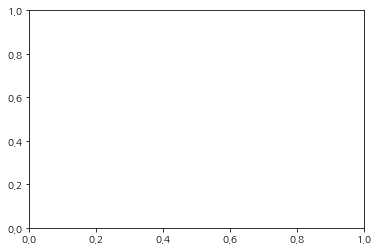

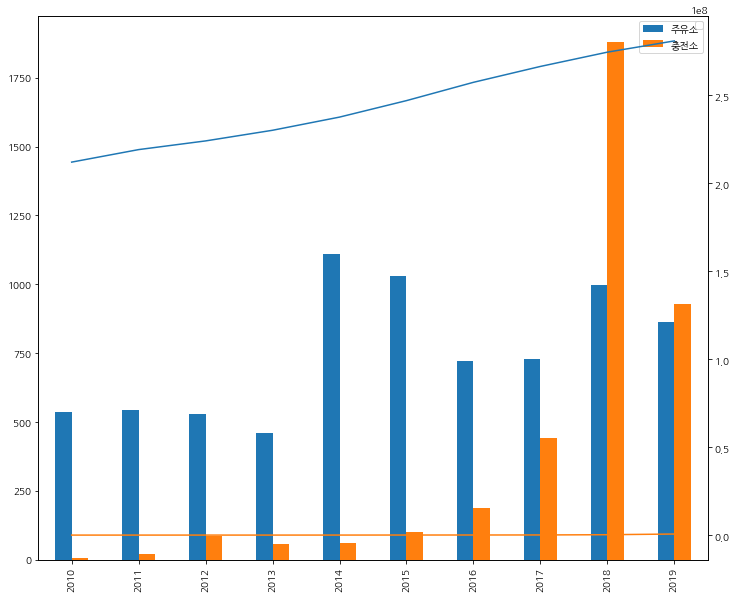

In [77]:
'''ax1 = car.plot(kind='bar',figsize=(12,10))

ax2 = ax1.twinx()
ax2.plot(station.index, station.values)'''

fig, ax1 = plt.subplots()
ax1 = station.plot(kind='bar',figsize=(12,10))

ax2 = ax1.twinx()
ax2.plot(car.index, car.values)
ax2.legend()